<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  

C:\Users\ADITHYA CHITTURI\AppData\Local\Temp\ipykernel_5400\1205690395.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(features, axis=1, inplace=True)
C:\Users\ADITHYA CHITTURI\AppData\Local\Temp\ipykernel_5400\1205690395.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_train['log_sale_price'] = np.log(house_train['SalePrice'])
C:\Users\ADITHYA CHITTURI\AppData\Local\Temp\ipykernel_5400\1205690395.py:106: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 224 entries, LotArea to SaleCondition_Partial
dtypes: float64(9), int64(35), uint8(180)
memory usage: 769.9 KB
{'max_features': 50, 'n_estimators': 5}
0.1584103991922276
0.07372477097582536


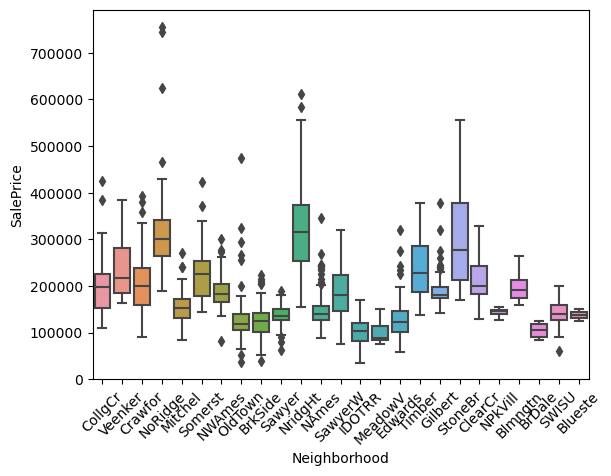

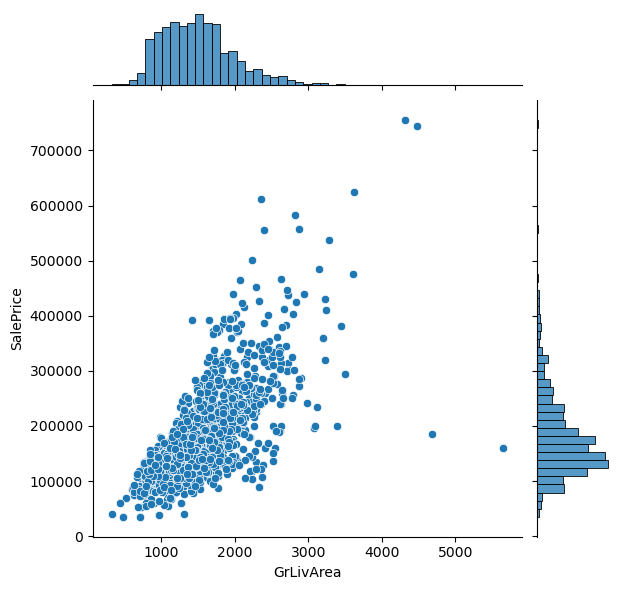

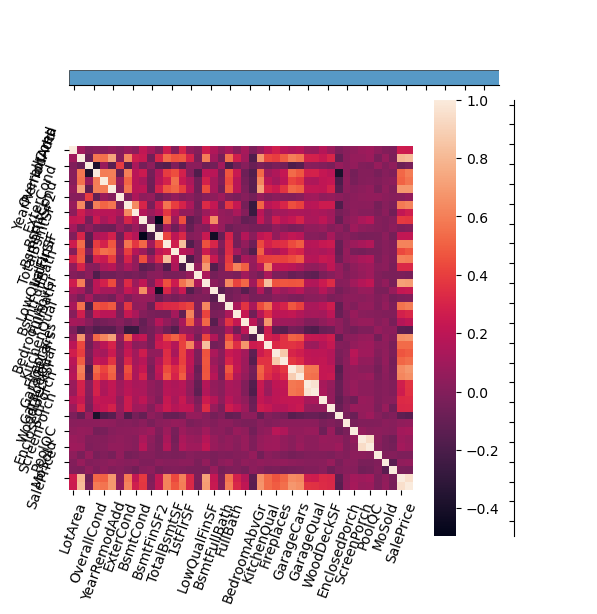

In [1]:
import os
import pandas as pd
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def get_continuous_columns(df):
    return df.select_dtypes(include=['number']).columns

def get_categorical_columns(df):
    return df.select_dtypes(exclude=['number']).columns

def transform_cat_to_cont(df, features, mappings):
    for feature in features:
        null_idx = df[feature].isnull()
        df.loc[null_idx, feature] = None 
        df[feature] = df[feature].map(mappings)

def transform_cont_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

def get_features_missing_data(df, cutoff):
    total_missing = df.isnull().sum()
    n = df.shape[0]
    to_delete = total_missing[(total_missing/n) > cutoff ]
    return list(to_delete.index)

def filter_features(df, features):
    df.drop(features, axis=1, inplace=True)

def get_imputers(df, features):
    all_cont_features = get_continuous_columns(df)
    cont_features = []
    cat_features = []
    for feature in features:
        if feature in all_cont_features:
            cont_features.append(feature)
        else:
            cat_features.append(feature)
    mean_imputer = preprocessing.Imputer()
    mean_imputer.fit(df[cont_features])
    mode_imputer = preprocessing.Imputer(strategy="most_frequent")
    mode_imputer.fit(df[cat_features])
    return mean_imputer, mode_imputer

def impute_missing_data(df, featuers, imputers):
    all_cont_features = get_continuous_columns(df)
    cont_features = []
    cat_features = []
    for feature in features:
        if feature in all_cont_features:
            cont_features.append(feature)
        else:
            cat_features.append(feature)

    df[cont_features] = imputers[0].transform(df[cont_features])
    df[cat_features] = imputers[1].transform(df[cat_features])
 
def get_heat_map_corr(df):
    corr = df.select_dtypes(include = ['number']).corr()
    sns.heatmap(corr, square=True)
    plt.xticks(rotation=70)
    plt.yticks(rotation=70)
    return corr

def get_target_corr(corr, target):
    return corr[target].sort_values(axis=0,ascending=False)

def one_hot_encode(df):
   features = get_categorical_columns(df)
   return pd.get_dummies(df, columns=features)

def rmse(y_orig, y_pred):
    return math.sqrt(metrics.mean_squared_error(y_orig,y_pred))
  
def feature_importances(estimator):
    return estimator.feature_importances_

def fit_model(estimator, grid, X_train, y_train):
   grid_estimator = model_selection.GridSearchCV(estimator, grid, scoring = metrics.make_scorer(rmse), cv=10, n_jobs=10)
   grid_estimator.fit(X_train, y_train)
   #print(grid_estimator.grid_scores_)
   print(grid_estimator.best_params_)
   print(grid_estimator.best_score_)
   print(grid_estimator.score(X_train, y_train))
   return grid_estimator.best_estimator_

def predict(estimator, X_test):
    return estimator.predict(X_test)

#to uncover the mismatch of levels between train and test data
def merge(df1, df2):
    return pd.concat([df1, df2])

def split(df, ind):
    return (df[0:ind], df[ind:])

#Visualize preferably Continuous data with count
def viz_cont(df, features):
    for feature in features:
        sns.distplot(df[feature],kde=False)

def viz_cont_cont(df, features, target):
    for feature in features:
        sns.jointplot(x = feature, y = target, data = df)
        
def viz_cat_cont_box(df, features, target):
    for feature in features:
        sns.boxplot(x = feature, y = target,  data = df)
        plt.xticks(rotation=45)


#Real fun starts here!
os.chdir("C:/Users/ADITHYA CHITTURI/Downloads/houseprice")

house_train = pd.read_csv("train.csv")
house_train.shape
house_train.info()

house_test = pd.read_csv("test.csv")
house_test.shape
house_test.info()
house_test['SalePrice'] = 0

house_data = merge(house_train, house_test)
house_data.shape
house_data.info()

print(get_continuous_columns(house_data))
print(get_categorical_columns(house_data))

#convert numerical columns to categorical type              
features = ['MSSubClass']
transform_cont_to_cat(house_data, features)

#map string categoical values to numbers
ordinal_features = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "GarageQual", "GarageCond", "PoolQC", "FireplaceQu", "KitchenQual", "HeatingQC"]
quality_dict = {None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
transform_cat_to_cont(house_data, ordinal_features, quality_dict)

print(get_continuous_columns(house_data))
print(get_categorical_columns(house_data))

house_train, house_test = split(house_data, house_train.shape[0])
house_train.shape
house_test.shape

#filter missing data columns
missing_features = get_features_missing_data(house_train, 0)
filter_features(house_train, missing_features)
house_train.shape
house_train.info()

#smooth the sale price using log transformation(smoothening outlier data)
house_train['log_sale_price'] = np.log(house_train['SalePrice'])
features = ['SalePrice','log_sale_price']
viz_cont(house_train, features)

#explore relationship of neighborhood to saleprice
target = 'SalePrice'
features = ['Neighborhood']
viz_cat_cont_box(house_train, features, target)

#explore relationship of livarea and totalbsmt to saleprice
features = ['GrLivArea','TotalBsmtSF']
viz_cont_cont(house_train, features, target)

filter_features(house_train, ['Id'])

#explore relation among all continuous features vs saleprice 
corr = get_heat_map_corr(house_train)
get_target_corr(corr, 'SalePrice')
get_target_corr(corr, 'log_sale_price')

#do one-hot-encoding for all the categorical features
print(get_categorical_columns(house_train))
house_train1 = one_hot_encode(house_train)
house_train1.shape
house_train1.info()

filter_features(house_train1, ['SalePrice','log_sale_price'])
X_train = house_train1
y_train = house_train['log_sale_price']

rf_estimator = ensemble.RandomForestRegressor(random_state=2017)
rf_grid = {'max_features':[50], 'n_estimators':[5]}
model = fit_model(rf_estimator, rf_grid, X_train, y_train)

##Prediction
#X_test = house_test
#log_sales_price = model.predict(X_test)
##Convert Log slae price back to sale price using np.Exponential function
#house_test['SalePrice'] = np.exp(log_sales_price)
#house_test.to_csv("submission_houseRF.csv", columns=['Id','SalePrice'], index=False)